# Лабораторна робота №1

Виконав студент групи ФІ-52мн Ісаченко Н. С.

In [209]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from pathlib import Path

1) Завантажити дані, вивести назви колонок і розмір датасета

In [210]:
dir_path = kagglehub.dataset_download("mdsultanulislamovi/sleep-disorder-diagnosis-dataset")

print("Path to dataset files:", dir_path)

dataset_path = Path(dir_path) / 'Sleep_health_and_lifestyle_dataset.csv'

print("Path to dataset:", dataset_path)

Path to dataset files: /home/misach/.cache/kagglehub/datasets/mdsultanulislamovi/sleep-disorder-diagnosis-dataset/versions/1
Path to dataset: /home/misach/.cache/kagglehub/datasets/mdsultanulislamovi/sleep-disorder-diagnosis-dataset/versions/1/Sleep_health_and_lifestyle_dataset.csv


In [211]:
df = pd.read_csv(dataset_path)
print("Cols:", df.columns.tolist())
print("Shape:", df.shape)
df.head()

Cols: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
Shape: (374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [212]:
print("Count of null values in the cols:", df.isnull().sum())

Count of null values in the cols: Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


Null значення у стовпці 'Sleep Disorder' будемо траткувати як відсутність порушень сну.

In [213]:
# Заповнюємо відсутні значення значенням 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print("Missing values after handling them:\n", df.isnull().sum())

df['Sleep Disorder'].value_counts()

Missing values after handling them:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)


Знайдемо коеф. кореляції між різними стовпичками

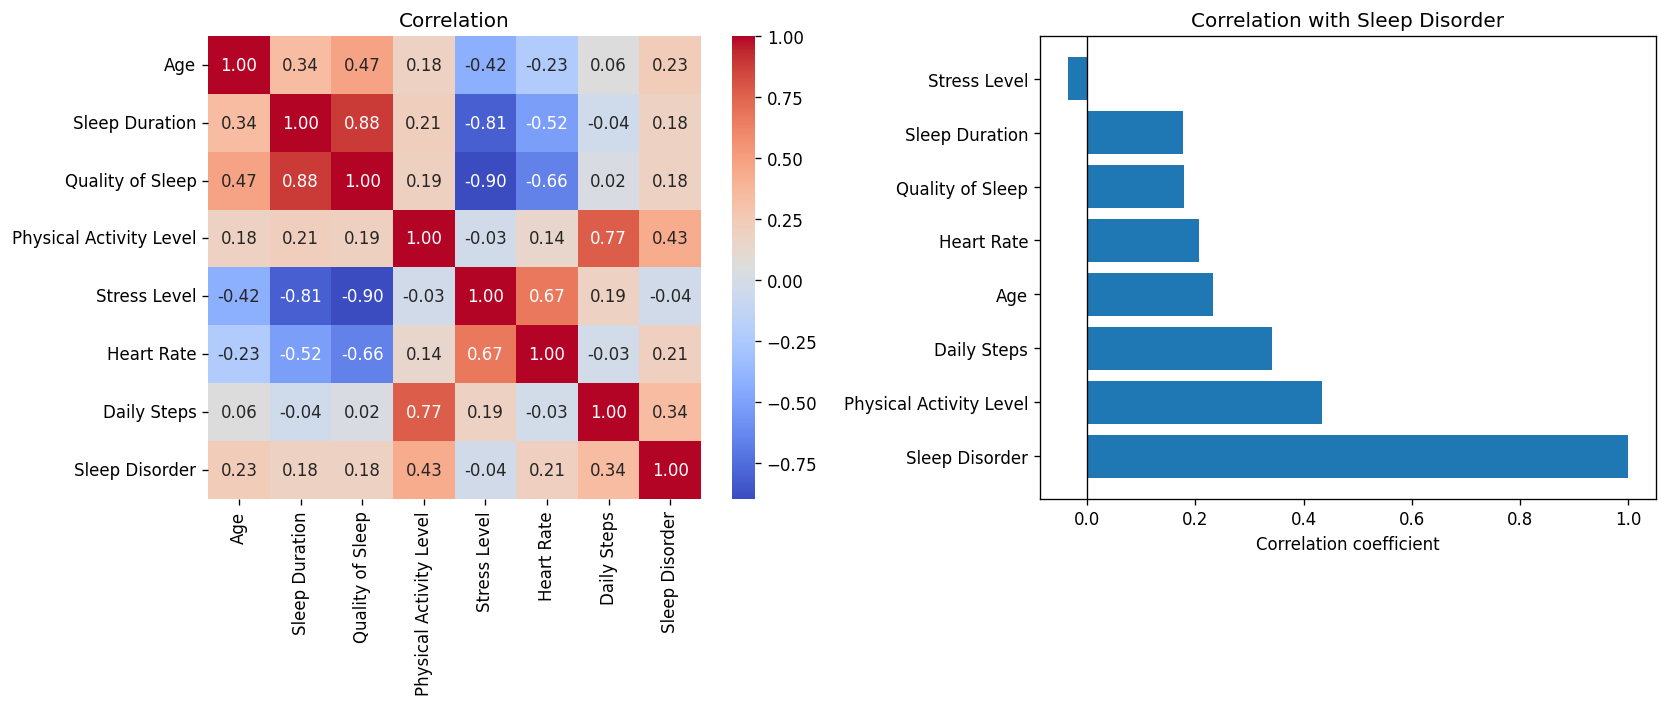

In [214]:
# corr = df.corr()
# # for col in df_encoded.select_dtypes(include='object'):
# #     df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# fig, ax = plt.subplots(figsize=(5, 4), dpi = 80)
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
# plt.show()

label_encoder = LabelEncoder()
df_copy = df.copy()
df_copy["Sleep Disorder"] = label_encoder.fit_transform(df_copy["Sleep Disorder"])

cols = [
    "Age",
    "Sleep Duration",
    "Quality of Sleep",
    "Physical Activity Level",
    "Stress Level",
    "Heart Rate",
    "Daily Steps",
    "Sleep Disorder",
]

corr = df_copy[cols].corr(method="pearson")
corr_target = corr["Sleep Disorder"].sort_values(ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), dpi=120)

sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", ax=axs[0])
axs[0].set_title("Correlation")

axs[1].barh(corr_target.index, corr_target.values)
axs[1].axvline(0, color='black', linewidth=0.8)
axs[1].set_title("Correlation with Sleep Disorder")
axs[1].set_xlabel("Correlation coefficient")

plt.tight_layout()
plt.show()


Тепер побудуємо гісторграму та boxplot.

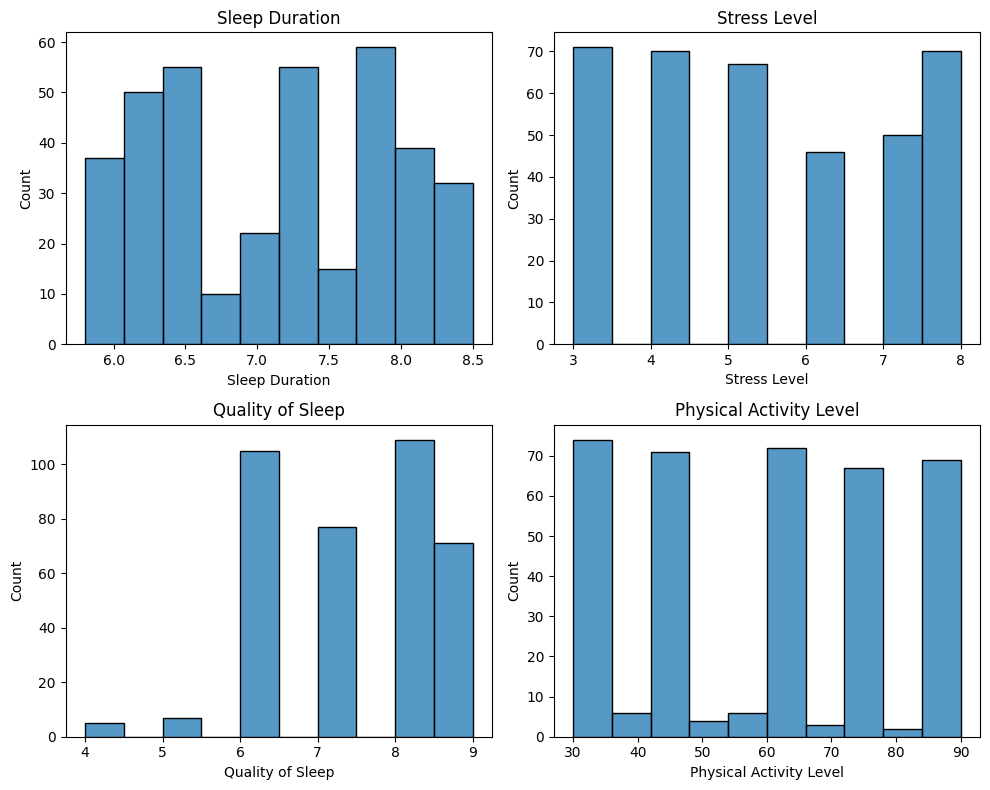

In [215]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), dpi=100)

sns.histplot(
    data=df_copy,
    x='Sleep Duration',
    bins=10,
    kde=False,
    ax=axs[0][0]
)

sns.histplot(
    data=df_copy,
    x='Stress Level',
    bins=10,
    kde=False,
    ax=axs[0][1]
)

sns.histplot(
    data=df_copy,
    x='Quality of Sleep',
    bins=10,
    kde=False,
    ax=axs[1][0],
)

sns.histplot(
    data=df_copy,
    x='Physical Activity Level',
    bins=10,
    kde=False,
    ax=axs[1][1],
)

axs[0][0].set_title('Sleep Duration')
axs[0][1].set_title('Stress Level')
axs[1][0].set_title('Quality of Sleep')
axs[1][1].set_title('Physical Activity Level')

plt.tight_layout()
plt.show()


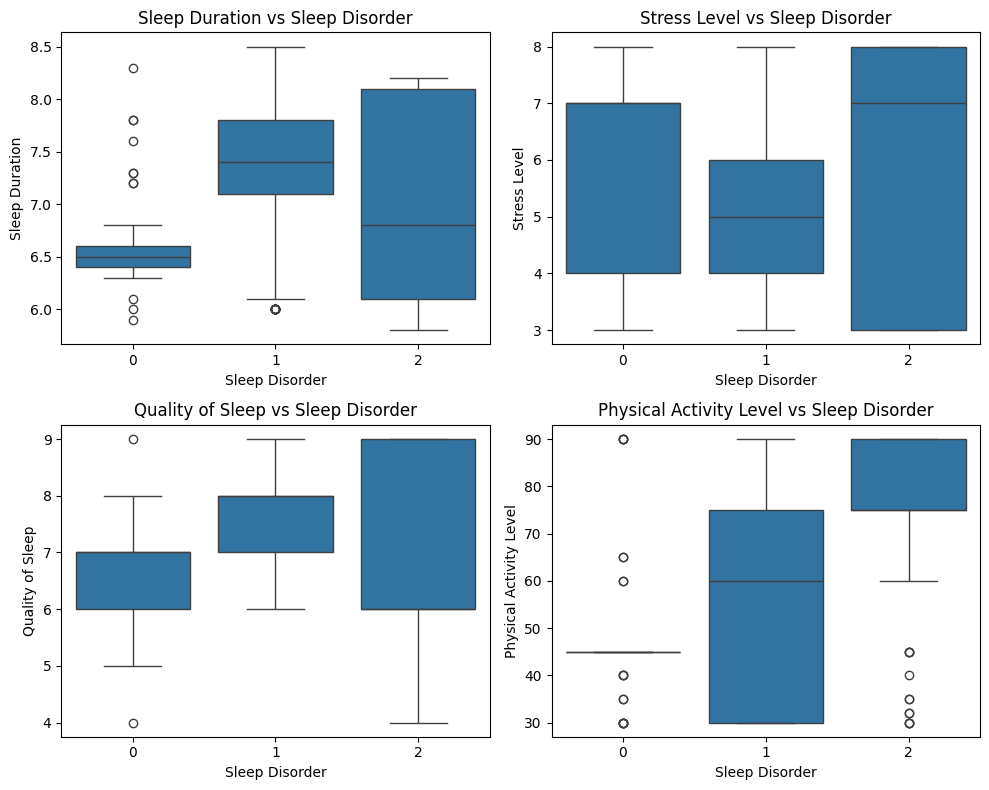

In [216]:
features = [
    'Sleep Duration',
    'Stress Level',
    'Quality of Sleep',
    'Physical Activity Level'
]

fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=100)

for ax, feature in zip(axs.flat, features):
    sns.boxplot(
        data=df_copy,
        x='Sleep Disorder',
        y=feature,
        ax=ax
    )
    ax.set_title(f'{feature} vs Sleep Disorder')
    ax.set_xlabel('Sleep Disorder')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

4) Нормалізувати дані

In [217]:
cols = [
    'Age',
    'Sleep Duration',
    'Quality of Sleep',
    'Physical Activity Level',
    'Stress Level',
    'Heart Rate',
    'Daily Steps'
]

scaler = StandardScaler()
df_scaled = df_copy.copy()

df_scaled[cols] = scaler.fit_transform(df_copy[cols])
df_scaled[cols].describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02
mean,-4.559633e-16,1.348891e-15,2.469801e-16,-3.324732e-17,1.994839e-16,-1.377389e-15,-9.499234e-17
std,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00
min,-1.753096e+00,-1.676439e+00,-2.771424e+00,-1.402260e+00,-1.345836e+00,-1.250750e+00,-2.362273e+00
25%,-8.006081e-01,-9.213348e-01,-1.098280e+00,-6.812078e-01,-7.815505e-01,-5.243827e-01,-7.531140e-01
50%,9.415288e-02,8.547080e-02,-2.617083e-01,3.984423e-02,-2.172650e-01,-4.013793e-02,1.133560e-01
75%,9.023241e-01,8.405750e-01,5.748635e-01,7.608963e-01,9.113060e-01,4.441068e-01,7.322631e-01
max,1.941401e+00,1.721530e+00,1.411435e+00,1.481948e+00,1.475592e+00,3.833820e+00,1.970077e+00


5) Провести навчання наступних класифікаторів:
    - kNN
    - дерево ухвалення рішень
    - SVM
    - Random Forest
    - AdaBoost

Почнемо з класифікатора kNN:

In [218]:
x = df_scaled[['Sleep Duration', 'Stress Level']]
y = df_copy['Sleep Disorder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

[[14  1  0]
 [ 0 39  5]
 [ 1  3 12]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.91      0.89      0.90        44
           2       0.71      0.75      0.73        16

    accuracy                           0.87        75
   macro avg       0.85      0.86      0.85        75
weighted avg       0.87      0.87      0.87        75

0.8666666666666667


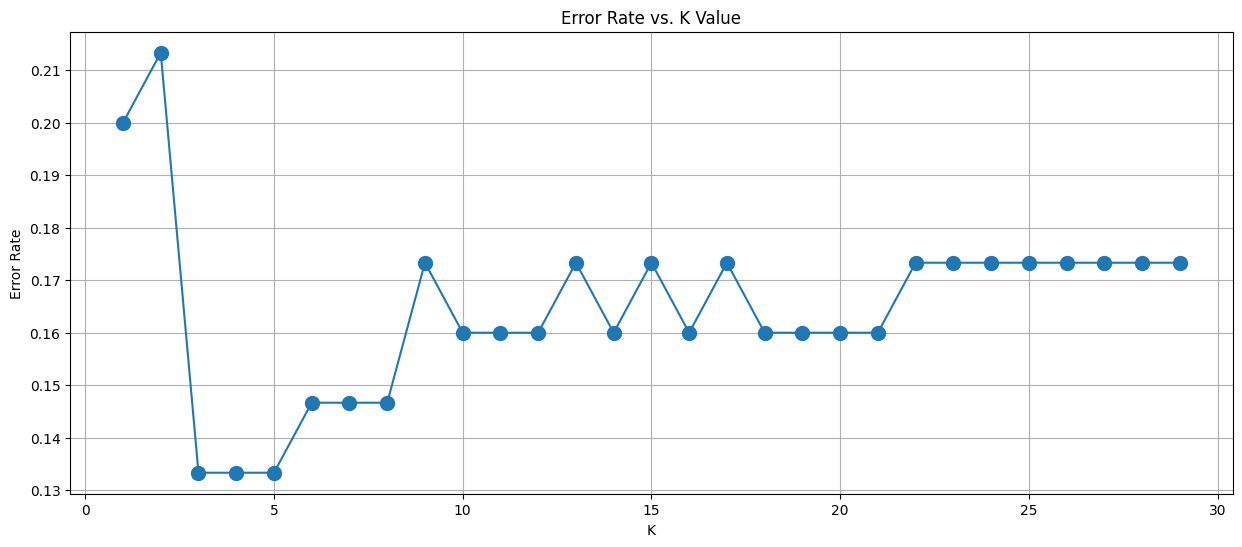

In [219]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

Згідно з графіком, оптимальним значенням k є 3.

In [220]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[14  1  0]
 [ 0 39  5]
 [ 1  3 12]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.91      0.89      0.90        44
           2       0.71      0.75      0.73        16

    accuracy                           0.87        75
   macro avg       0.85      0.86      0.85        75
weighted avg       0.87      0.87      0.87        75

0.8666666666666667


In [221]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

- Дерево ухвалення рішень

In [222]:
dt_df = df_scaled.copy()
x = dt_df[['Sleep Duration', 'Stress Level', 'Quality of Sleep']]
y = dt_df['Sleep Disorder']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [223]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_leaf=6,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), '\n\n')
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[14  1  0]
 [ 1 33 10]
 [ 1  0 15]] 


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.97      0.75      0.85        44
           2       0.60      0.94      0.73        16

    accuracy                           0.83        75
   macro avg       0.82      0.87      0.83        75
weighted avg       0.87      0.83      0.83        75



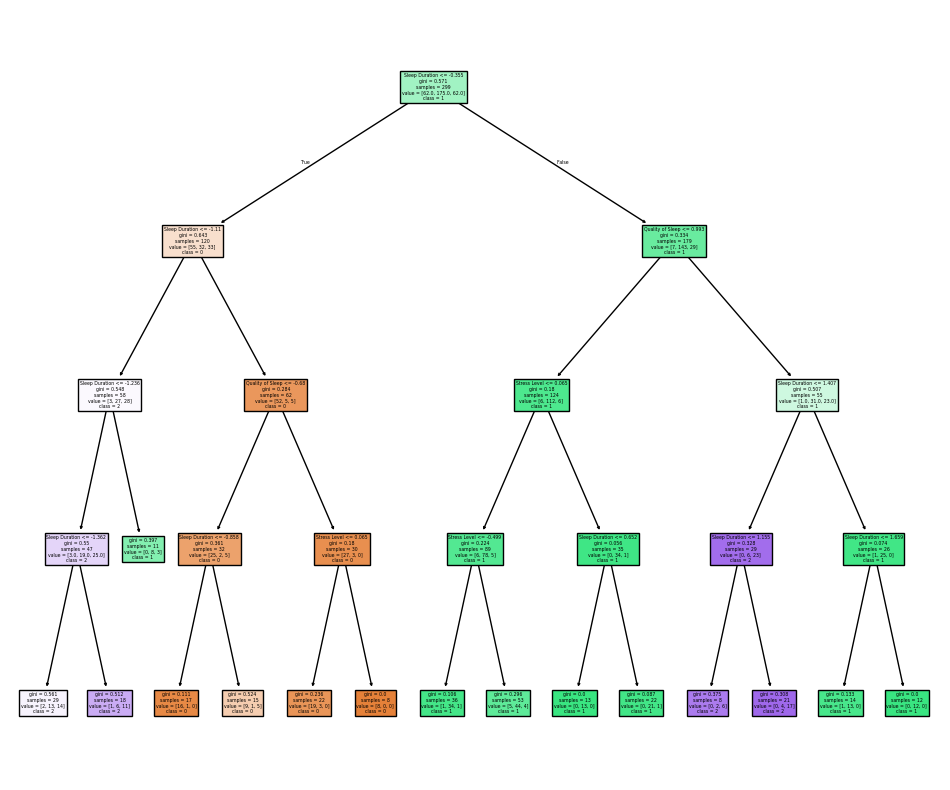

In [224]:
# Plot tree with correct feature names
plt.figure(figsize=(12, 10))

plot_tree(
    model,
    feature_names=['Sleep Duration', 'Stress Level', 'Quality of Sleep'],
    class_names=[str(c) for c in model.classes_],
    filled=True
)

plt.show()

In [225]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Підберемо параметри під дерево рішень

In [226]:
param_grid = {
    "criterion": ["gini", "entropy"],          # entropy теж ок
    "max_depth": [2, 3, 4, 5, 6, None],
    "min_samples_leaf": [1, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10, 20],
}

gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro" 
)

gs.fit(X_train, y_train)

best_dt = gs.best_estimator_
print("Best params:", gs.best_params_)

y_pred = best_dt.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}
Confusion Matrix:
 [[14  1  0]
 [ 1 33 10]
 [ 1  0 15]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.97      0.75      0.85        44
           2       0.60      0.94      0.73        16

    accuracy                           0.83        75
   macro avg       0.82      0.87      0.83        75
weighted avg       0.87      0.83      0.83        75



## SVN

In [227]:
model = SVC(C=1.0, gamma = 'scale', kernel = 'rbf')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [228]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

svm_gs = GridSearchCV(SVC(), param_grid, cv=4,refit=True)

svm_gs.fit(x_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",4
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and cand

In [229]:
print(svm_gs.best_params_)
best_svm = svm_gs.best_estimator_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [230]:
y_pred = best_svm.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  1  0]
 [ 0 35  9]
 [ 1  0 15]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.97      0.80      0.88        44
           2       0.62      0.94      0.75        16

    accuracy                           0.85        75
   macro avg       0.84      0.89      0.85        75
weighted avg       0.89      0.85      0.86        75



- Random forest

In [231]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [232]:
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  1  0]
 [ 0 39  5]
 [ 1  3 12]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.91      0.89      0.90        44
           2       0.71      0.75      0.73        16

    accuracy                           0.87        75
   macro avg       0.85      0.86      0.85        75
weighted avg       0.87      0.87      0.87        75



- AdaBoost

In [233]:
ab = AdaBoostClassifier(random_state = 42)
ab.fit(x_train, y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",50
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [234]:
y_pred = ab.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  1  0]
 [ 1 33 10]
 [ 1  0 15]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.97      0.75      0.85        44
           2       0.60      0.94      0.73        16

    accuracy                           0.83        75
   macro avg       0.82      0.87      0.83        75
weighted avg       0.87      0.83      0.83        75

